In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


Train shape: (60000, 784) (60000,)
Test shape: (10000, 784)


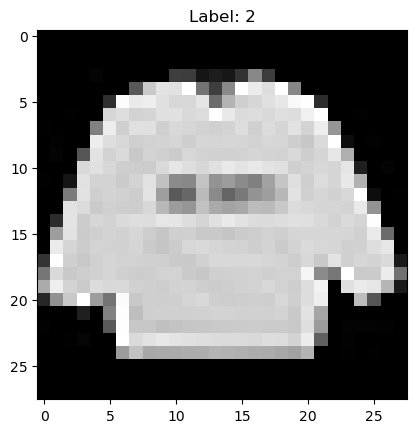

In [7]:
TRAIN_PATH = r'C:\Users\skltsd\Anaconda_HW\9LW\fashion-mnist_train.csv'
TEST_PATH = r'C:\Users\skltsd\Anaconda_HW\9LW\fashion-mnist_test.csv'

train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0].astype(np.int64)
X_test = test_df.values[:, 1:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape)

plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [8]:
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)

num_classes = 10

In [10]:
D_in = 784  
H = 100     
D_out = 10 

net = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out)
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-4)

In [15]:
def generate_batches(X, y, batch_size=64):    
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield X_batch, y_batch

In [16]:
BATCH_SIZE = 64
NUM_EPOCHS = 10  

for epoch in range(NUM_EPOCHS):
    running_loss = 0.0
    for iter_num, (X_batch, y_batch) in enumerate(generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE)):
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {running_loss/len(X_train_tensor):.6f}")


Epoch 1/10, Loss: 0.006848
Epoch 2/10, Loss: 0.006728
Epoch 3/10, Loss: 0.006620
Epoch 4/10, Loss: 0.006524
Epoch 5/10, Loss: 0.006434
Epoch 6/10, Loss: 0.006351
Epoch 7/10, Loss: 0.006274
Epoch 8/10, Loss: 0.006203
Epoch 9/10, Loss: 0.006137
Epoch 10/10, Loss: 0.006075


In [17]:
with torch.no_grad():
    y_pred = net(X_train_tensor)
    predicted = torch.argmax(y_pred, dim=1)
    accuracy = (predicted == y_train_tensor).float().mean()
    print(f"Train accuracy: {accuracy*100:.2f}%")

Train accuracy: 86.08%


In [19]:
with torch.no_grad():
    y_test_pred = net(X_test_tensor)
    predicted_test = torch.argmax(y_test_pred, dim=1).cpu().numpy()

answer_df = pd.DataFrame({
    "Id": np.arange(len(predicted_test)),
    "Category": predicted_test
})

answer_df.to_csv('./baseline.csv', index=False)
print("Predictions saved to baseline.csv")

Predictions saved to baseline.csv
